In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('resultados/all_results_v4.csv')
df['Tipo'] = df['Tipo'].replace(['CITUS_ROW', 'CITUS_SCHEMA', 'ORIGINAL'], ['Citus Row', 'Citus Schema', 'Original'])

df['Tempo'].describe()

count    61000.000000
mean         0.299196
std          1.618286
min          0.000185
25%          0.022164
50%          0.056977
75%          0.157073
max         28.416015
Name: Tempo, dtype: float64

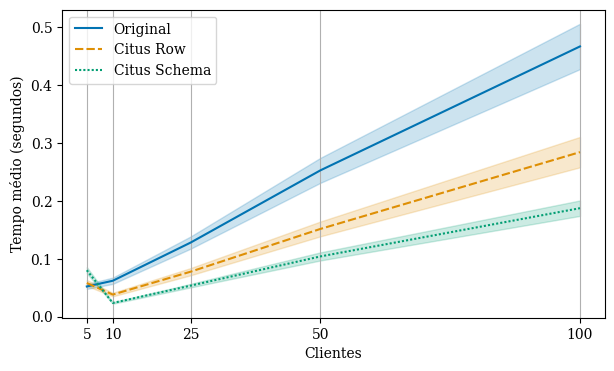

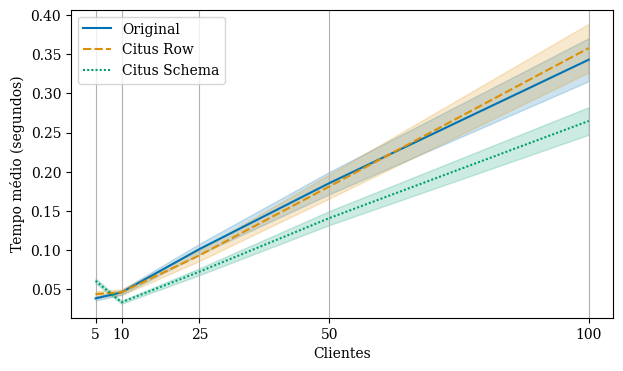

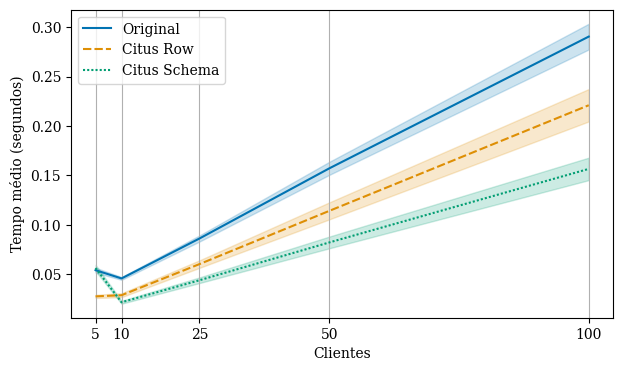

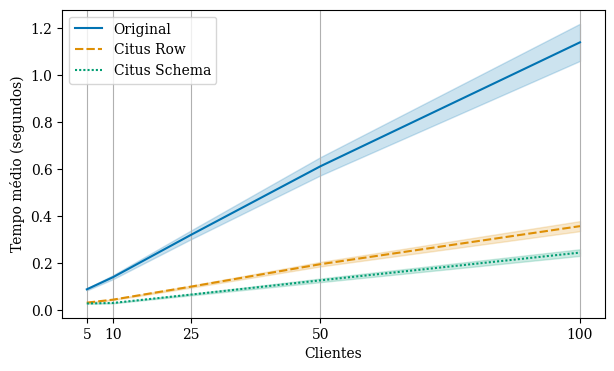

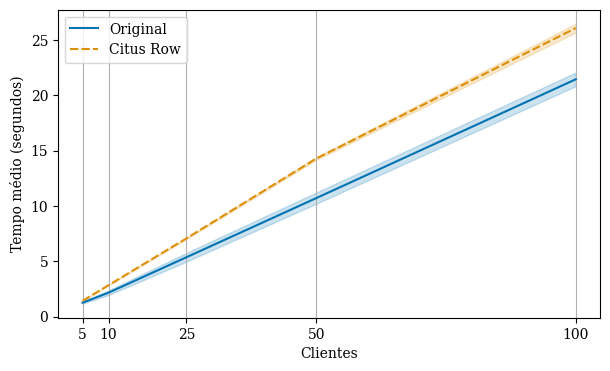

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

for queryId in df['QueryID'].unique():
    # Criando séries para cada tipo
    df_query = df[df['QueryID'] == queryId]

    # Plotando o gráfico
    plt.figure(figsize=(7, 4))

    ax = sns.lineplot(x="Clientes", y="Tempo", data=df_query, hue="Tipo", style="Tipo", err_style="band", errorbar=("se", 2), palette='colorblind')
    plt.xlabel('Clientes')
    plt.ylabel('Tempo médio (segundos)')
    plt.xticks([5, 10, 25, 50, 100])
    plt.legend()
    plt.grid(axis='x', visible=True)

plt.show()

In [9]:
for queryId in df['QueryID'].unique():
    # Criando séries para cada tipo
    df_query = df[df['QueryID'] == queryId]
    d = {
        f'Média{queryId}':('Tempo','mean')
    }
    display(df_query.groupby(['Clientes', 'Tipo']).agg(**d).sort_values(['Clientes', 'Tipo'], ascending=[True, False]).unstack(sort=False))

Média1                       
Tipo      Original Citus Schema Citus Row
Clientes                                 
5         0.052092     0.080155  0.058150
10        0.061993     0.023649  0.038130
25        0.127894     0.053555  0.077647
50        0.252550     0.103990  0.151428
100       0.466387     0.187222  0.283971

Média2                       
Tipo      Original Citus Schema Citus Row
Clientes                                 
5         0.038234     0.060700  0.043850
10        0.045966     0.033372  0.046056
25        0.101230     0.072342  0.093187
50        0.185424     0.140783  0.181155
100       0.343174     0.264921  0.357989

Média3                       
Tipo      Original Citus Schema Citus Row
Clientes                                 
5         0.054025     0.056204  0.027529
10        0.045674     0.021557  0.028694
25        0.086040     0.043824  0.060154
50        0.157006     0.082055  0.113986
100       0.290381     0.156512  0.220925

Média4                       
Tipo      Original Citus Schema Citus Row
Clientes                                 
5         0.087461     0.027293  0.030792
10        0.138753     0.029271  0.043362
25        0.318776     0.064978  0.098688
50        0.611684     0.125763  0.194598
100       1.139630     0.244008  0.356609

Média5           
Tipo       Original  Citus Row
Clientes                      
5          1.259571   1.429105
10         2.165043   2.842125
25         5.367768   7.073263
50        10.711870  14.287652
100       21.454434  26.084315